Visando exercitar os conceitos aprendidos nas aulas de limpeza, transformação e dados e Redução de casos (amostragem), escolha uma base de dados que possua atributos numéricos (int ou float) e discretos (object) no abaixo  (https://www.dropbox.com/sh/f6i1fj8qpjpud9c/AABMYB-Yfc7jTOZHB_qHPdGBa?dl=0 ):



A seguir, execute as seguintes etapas relacionas à limpeza e transformação dos
atributos da base escolhida:
1. Verifique se há missing values. Se houver aplique um dos métodos
relacionados a esse tipo de problema (mostrados nas aulas);
2. Aplique as transformações necessárias para os atributos numéricos e discretos;
3. Salve uma versão em CSV dessa base limpa e transformada.

De posse da versão limpa e transformada, crie diversas amostragens dos dados, de
acordo com o que se pede abaixo:
1. Amostragem simples de 30% e sem reposição;
2. Amostragem simples de 30% e com reposição;
3. Amostragem simples de 50% e sem reposição;
4. Amostragem simples de 50% e com reposição;
5. Amostragem estratificada de 50% (mesmas proporções);
6. Amostragem simples de 70% e sem reposição;
7. Amostragem simples de 70% e com reposição;
8. Amostragem estratificada de 70% (mesmas proporções).
Por último, submeta, via SIGAA, o seu Jupyter Notebook que executa todos os passos
utilizados para limpar e transformar a base de dados escolhida, além daqueles utilizados para
criar as diversas amostragens exigidas. Sua submissão valerá a presença referente a essa aula
assíncrona.

#Escolhido: Abalone.csv

In [47]:
#Pré-processamento de dados, carrergar arquivos Aabalone.csv para realizar pre-processamento de dados
import pandas as pd
import numpy as np

#importing dataset
#dataset = pd.read_csv('Abalone.csv', encoding='utf-8')


# Importing dataset from GitHub RAW link
url = 'https://raw.githubusercontent.com/Croncl/IMD3002-AM_SUPERVISIONADO/main/Abalone.csv'
dataset = pd.read_csv(url, encoding='utf-8')

# Salvar o arquivo na pasta atual do Colab
dataset.to_csv('Abalone.csv', index=False, encoding='utf-8')
print("✅ Arquivo salvo como 'Abalone.csv' na pasta atual do Colab")

#visualizacao dos atributos
dataset.info()

#Mostrando o dataset
dataset.head(10)

✅ Arquivo salvo como 'Abalone.csv' na pasta atual do Colab
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            4177 non-null   object 
 1   length         4177 non-null   float64
 2   diameter       4177 non-null   float64
 3   height         4177 non-null   float64
 4   wholeweight    4177 non-null   float64
 5   shuckedweight  4177 non-null   float64
 6   visceraweight  4177 non-null   float64
 7   shellweight    4177 non-null   float64
 8   class          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [49]:
#Média e Mediana dos atributos:
# Selecionar apenas as colunas numéricas (excluindo a coluna 'sex' que é object)
colunas_numericas = dataset.select_dtypes(include=[np.number]).columns.tolist()

print("\n" + "="*50)
print("ESTATÍSTICAS DESCRITIVAS - ATRIBUTOS NUMÉRICOS")
print("="*50)

# Calcular e exibir média e mediana para cada atributo numérico
for coluna in colunas_numericas:
    media = dataset[coluna].mean()
    mediana = dataset[coluna].median()

    print(f"\n{coluna.upper():<15}")
    print(f"  Média:    {media:.4f}")
    print(f"  Mediana:  {mediana:.4f}")

# Usando describe() para obter todas as estatísticas de uma vez
print("\n" + "="*50)
print("ESTATÍSTICAS COMPLETAS (método describe())")
print("="*50)
print(dataset[colunas_numericas].describe())

# Exibir também a moda para referência
print("\n" + "="*50)
print("MODA DOS ATRIBUTOS")
print("="*50)
for coluna in colunas_numericas:
    moda = dataset[coluna].mode()
    print(f"{coluna.upper():<20}: {moda.values[0]:.4f}")

# Para a coluna categórica 'sex', podemos calcular a moda
print(f"\n{'SEX (categórico)':<20}")
print(f"  Moda:     {dataset['sex'].mode().values[0]}")


ESTATÍSTICAS DESCRITIVAS - ATRIBUTOS NUMÉRICOS

LENGTH         
  Média:    0.5240
  Mediana:  0.5450

DIAMETER       
  Média:    0.4079
  Mediana:  0.4250

HEIGHT         
  Média:    0.1395
  Mediana:  0.1400

WHOLEWEIGHT    
  Média:    0.8287
  Mediana:  0.7995

SHUCKEDWEIGHT  
  Média:    0.3594
  Mediana:  0.3360

VISCERAWEIGHT  
  Média:    0.1806
  Mediana:  0.1710

SHELLWEIGHT    
  Média:    0.2388
  Mediana:  0.2340

CLASS          
  Média:    9.9337
  Mediana:  9.0000

ESTATÍSTICAS COMPLETAS (método describe())
            length     diameter       height  wholeweight  shuckedweight  \
count  4177.000000  4177.000000  4177.000000  4177.000000    4177.000000   
mean      0.523992     0.407881     0.139516     0.828742       0.359367   
std       0.120093     0.099240     0.041827     0.490389       0.221963   
min       0.075000     0.055000     0.000000     0.002000       0.001000   
25%       0.450000     0.350000     0.115000     0.441500       0.186000   
50%       0.

In [50]:
# Checando Missing Values
print("\n" + "="*50)
print("VERIFICAÇÃO DE MISSING VALUES")
print("="*50)
missing = dataset.isnull().sum()
print(missing)


VERIFICAÇÃO DE MISSING VALUES
sex              0
length           0
diameter         0
height           0
wholeweight      0
shuckedweight    0
visceraweight    0
shellweight      0
class            0
dtype: int64


In [51]:
# Checando Missing Values
print("\n" + "="*50)
print("VERIFICAÇÃO DE MISSING VALUES")
print("="*50)
missing = dataset.isnull().sum()
print(missing)

# Verificação de valores negativos ou zerados em medidas físicas
print("\n" + "="*60)
print("VERIFICAÇÃO DE VALORES NEGATIVOS OU ZERADOS")
print("="*60)

# Lista de colunas que representam medidas físicas (devem ser > 0)
colunas_medidas = ['length', 'diameter', 'height', 'wholeweight',
                   'shuckedweight', 'visceraweight', 'shellweight']

total_inconsistentes = 0

for coluna in colunas_medidas:
    # Valores negativos
    negativos = dataset[dataset[coluna] < 0]
    # Valores zerados
    zerados = dataset[dataset[coluna] == 0]

    print(f"\n{coluna.upper():<15}")
    print(f"  Valores negativos: {len(negativos)}")
    print(f"  Valores zerados:   {len(zerados)}")

    if len(negativos) > 0:
        print(f"  ⚠️  Valores negativos encontrados: {negativos[coluna].values}")

    if len(zerados) > 0:
        print(f"  ⚠️  Valores zerados encontrados: {zerados[coluna].values}")

    total_inconsistentes += len(negativos) + len(zerados)

# Verificação adicional para a coluna 'class' (idade em anos)
print(f"\n{'CLASS':<15}")
negativos_class = dataset[dataset['class'] < 0]
zerados_class = dataset[dataset['class'] == 0]
print(f"  Valores negativos: {len(negativos_class)}")
print(f"  Valores zerados:   {len(zerados_class)}")

total_inconsistentes += len(negativos_class) + len(zerados_class)

# Resumo geral
print("\n" + "="*60)
print("RESUMO DA VERIFICAÇÃO DE INCONSISTÊNCIAS")
print("="*60)

if total_inconsistentes == 0:
    print("✅ Nenhum valor negativo ou zerado encontrado!")
    print("✅ Todas as medidas físicas estão dentro dos limites esperados (>0)")
else:
    print(f"⚠️  Total de valores inconsistentes encontrados: {total_inconsistentes}")
    print("🔧 Recomenda-se tratamento para esses valores")

# Verificação de limites inferiores realistas
print("\n" + "="*60)
print("VERIFICAÇÃO DE VALORES ABAIXO DO LIMITE REALISTA")
print("="*60)

# Definindo limites mínimos realistas para cada medida
limites_minimos = {
    'length': 0.01,          # pelo menos 0.01 mm
    'diameter': 0.01,        # pelo menos 0.01 mm
    'height': 0.01,          # pelo menos 0.01 mm
    'wholeweight': 0.001,    # pelo menos 0.001 gramas
    'shuckedweight': 0.001,  # pelo menos 0.001 gramas
    'visceraweight': 0.001,  # pelo menos 0.001 gramas
    'shellweight': 0.001,    # pelo menos 0.001 gramas
    'class': 1               # pelo menos 1 ano de idade
}

for coluna, limite in limites_minimos.items():
    abaixo_limite = dataset[dataset[coluna] < limite]
    if len(abaixo_limite) > 0:
        print(f"⚠️  {coluna.upper():<15}: {len(abaixo_limite)} valores abaixo do limite realista ({limite})")
        if len(abaixo_limite) <= 10:  # Mostra valores se forem poucos
            print(f"    Valores: {abaixo_limite[coluna].values}")
    else:
        print(f"✅ {coluna.upper():<15}: Todos os valores acima do limite mínimo ({limite})")

print("\n" + "="*60)
print("ESTATÍSTICAS MÍNIMAS POR ATRIBUTO")
print("="*60)
for coluna in colunas_medidas + ['class']:
    min_valor = dataset[coluna].min()
    print(f"{coluna.upper():<15}: Mínimo = {min_valor:.6f}")


VERIFICAÇÃO DE MISSING VALUES
sex              0
length           0
diameter         0
height           0
wholeweight      0
shuckedweight    0
visceraweight    0
shellweight      0
class            0
dtype: int64

VERIFICAÇÃO DE VALORES NEGATIVOS OU ZERADOS

LENGTH         
  Valores negativos: 0
  Valores zerados:   0

DIAMETER       
  Valores negativos: 0
  Valores zerados:   0

HEIGHT         
  Valores negativos: 0
  Valores zerados:   2
  ⚠️  Valores zerados encontrados: [0. 0.]

WHOLEWEIGHT    
  Valores negativos: 0
  Valores zerados:   0

SHUCKEDWEIGHT  
  Valores negativos: 0
  Valores zerados:   0

VISCERAWEIGHT  
  Valores negativos: 0
  Valores zerados:   0

SHELLWEIGHT    
  Valores negativos: 0
  Valores zerados:   0

CLASS          
  Valores negativos: 0
  Valores zerados:   0

RESUMO DA VERIFICAÇÃO DE INCONSISTÊNCIAS
⚠️  Total de valores inconsistentes encontrados: 2
🔧 Recomenda-se tratamento para esses valores

VERIFICAÇÃO DE VALORES ABAIXO DO LIMITE REALISTA
✅ LEN

In [52]:
# Verificação e contagem de valores na coluna 'sex'
print("\n" + "="*50)
print("CONTAGEM DE VALORES NA COLUNA 'SEX'")
print("="*50)

# Contagem dos valores
contagem_sex = dataset['sex'].value_counts()
print("Quantidade de valores por categoria:")
print(contagem_sex)

# Valores únicos presentes
print(f"\nValores únicos encontrados: {dataset['sex'].unique()}")

# Estatísticas básicas
print(f"\nTotal de registros: {len(dataset)}")
print(f"Número de categorias: {len(contagem_sex)}")
print(f"Proporção de cada categoria:")
for valor, quantidade in contagem_sex.items():
    proporcao = (quantidade / len(dataset)) * 100
    print(f"  {valor}: {quantidade} registros ({proporcao:.2f}%)")


CONTAGEM DE VALORES NA COLUNA 'SEX'
Quantidade de valores por categoria:
sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

Valores únicos encontrados: ['M' 'F' 'I']

Total de registros: 4177
Número de categorias: 3
Proporção de cada categoria:
  M: 1528 registros (36.58%)
  I: 1342 registros (32.13%)
  F: 1307 registros (31.29%)


OBS.:O valor 'I' aparenta ser uma categoria válida no dataset Abalone,  por isso foi mantido na análise!



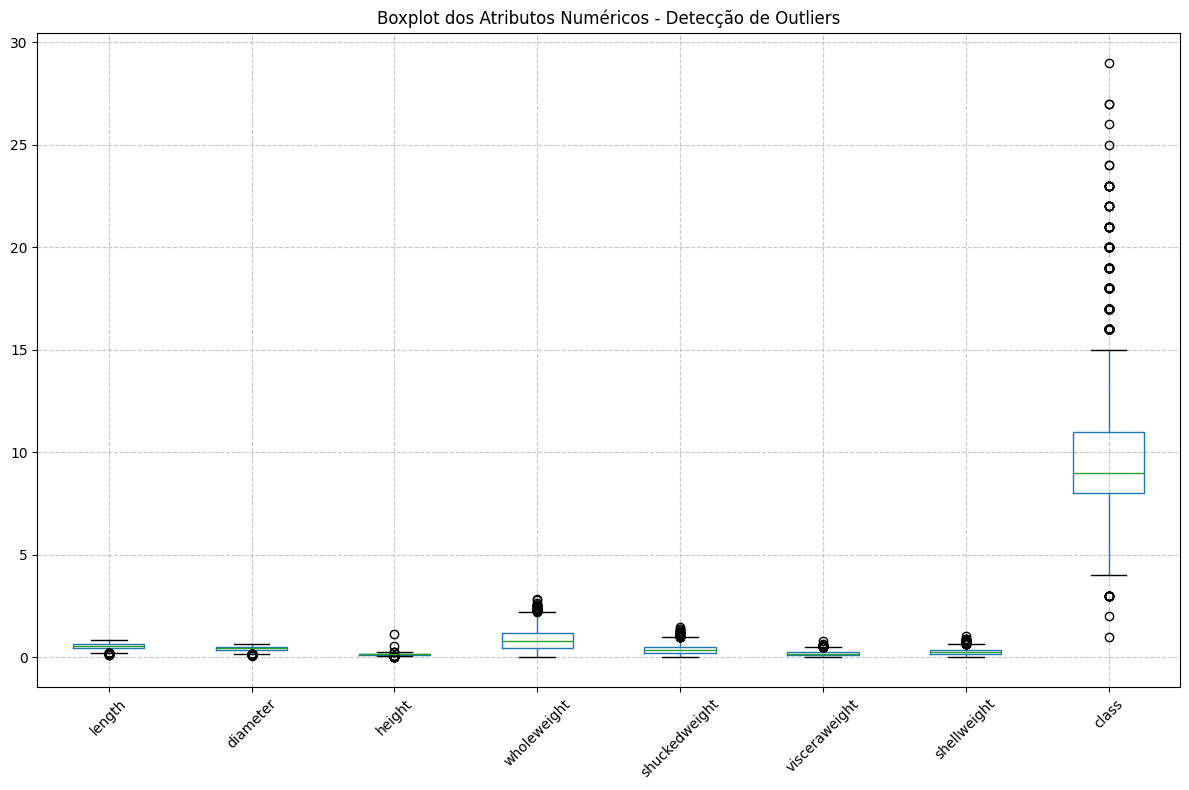


--------------------------------------------------
DETECÇÃO DE OUTLIERS POR MÉTODO IQR
--------------------------------------------------

LENGTH         
  Q1: 0.4500, Q3: 0.6150, IQR: 0.1650
  Limites: [0.2025, 0.8625]
  Outliers: 49 (1.17%)

DIAMETER       
  Q1: 0.3500, Q3: 0.4800, IQR: 0.1300
  Limites: [0.1550, 0.6750]
  Outliers: 59 (1.41%)

HEIGHT         
  Q1: 0.1150, Q3: 0.1650, IQR: 0.0500
  Limites: [0.0400, 0.2400]
  Outliers: 29 (0.69%)

WHOLEWEIGHT    
  Q1: 0.4415, Q3: 1.1530, IQR: 0.7115
  Limites: [-0.6258, 2.2203]
  Outliers: 30 (0.72%)

SHUCKEDWEIGHT  
  Q1: 0.1860, Q3: 0.5020, IQR: 0.3160
  Limites: [-0.2880, 0.9760]
  Outliers: 48 (1.15%)

VISCERAWEIGHT  
  Q1: 0.0935, Q3: 0.2530, IQR: 0.1595
  Limites: [-0.1458, 0.4923]
  Outliers: 26 (0.62%)

SHELLWEIGHT    
  Q1: 0.1300, Q3: 0.3290, IQR: 0.1990
  Limites: [-0.1685, 0.6275]
  Outliers: 35 (0.84%)

CLASS          
  Q1: 8.0000, Q3: 11.0000, IQR: 3.0000
  Limites: [3.5000, 15.5000]
  Outliers: 278 (6.66%)

-----

In [55]:
# Detecção de outliers
# Selecionar apenas os atributos numéricos (excluindo 'sex')
atributos_numericos = ['length', 'diameter', 'height', 'wholeweight',
                       'shuckedweight', 'visceraweight', 'shellweight', 'class']

dados = dataset[atributos_numericos]

# Criar boxplot para visualização dos outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
dados.boxplot()
plt.title('Boxplot dos Atributos Numéricos - Detecção de Outliers')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Método IQR para detecção quantitativa de outliers
print("\n" + "-"*50)
print("DETECÇÃO DE OUTLIERS POR MÉTODO IQR")
print("-"*50)

for coluna in atributos_numericos:
    Q1 = dados[coluna].quantile(0.25)
    Q3 = dados[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = dados[(dados[coluna] < limite_inferior) | (dados[coluna] > limite_superior)]
    percentual_outliers = (len(outliers) / len(dados)) * 100

    print(f"\n{coluna.upper():<15}")
    print(f"  Q1: {Q1:.4f}, Q3: {Q3:.4f}, IQR: {IQR:.4f}")
    print(f"  Limites: [{limite_inferior:.4f}, {limite_superior:.4f}]")
    print(f"  Outliers: {len(outliers)} ({percentual_outliers:.2f}%)")

# Método Z-score para comparação
print("\n" + "-"*50)
print("DETECÇÃO DE OUTLIERS POR Z-SCORE (>3σ)")
print("-"*50)

from scipy import stats

for coluna in atributos_numericos:
    z_scores = np.abs(stats.zscore(dados[coluna]))
    outliers_z = dados[z_scores > 3]
    percentual_outliers_z = (len(outliers_z) / len(dados)) * 100

    print(f"{coluna.upper():<15}: {len(outliers_z)} outliers ({percentual_outliers_z:.2f}%)")

# Resumo geral
print("\n" + "="*50)
print("RESUMO GERAL DE OUTLIERS")
print("="*50)

total_outliers_iqr = 0
total_outliers_z = 0

for coluna in atributos_numericos:
    # IQR
    Q1 = dados[coluna].quantile(0.25)
    Q3 = dados[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers_iqr = len(dados[(dados[coluna] < limite_inferior) | (dados[coluna] > limite_superior)])
    total_outliers_iqr += outliers_iqr

    # Z-score
    z_scores = np.abs(stats.zscore(dados[coluna]))
    outliers_z = len(dados[z_scores > 3])
    total_outliers_z += outliers_z

print(f"Total de outliers detectados (IQR): {total_outliers_iqr}")
print(f"Total de outliers detectados (Z-score >3σ): {total_outliers_z}")
print(f"Percentual médio de outliers por atributo (IQR): {(total_outliers_iqr/len(dados)/len(atributos_numericos)*100):.2f}%")

ANÁLISE - DECISÃO SOBRE OUTLIERS
📊 Percentual médio de outliers por atributo (IQR): 1.66%
📊 Percentual médio de outliers por atributo (Z-score): 0.62%
📈 Maior percentual individual (CLASS - IQR): 6.66%

🎯 DECISÃO: MANTER OS OUTLIERS
   ✓ Valores abaixo de 5% em média
   ✓ CLASS com 6.66% - variação biologicamente plausível
   ✓ Dataset grande o suficiente (4177 registros)
   ✓ Risco de perder informação relevante > benefício da 'limpeza'

In [56]:
# Salvar a base limpa e transformada
print("\n" + "="*50)
print("SALVANDO BASE LIMPA")
print("="*50)

# Verificação e tratamento de valores inconsistentes
print("🔍 Verificando e tratando valores inconsistentes...")

# Lista de colunas que representam medidas físicas
colunas_medidas = ['length', 'diameter', 'height', 'wholeweight',
                   'shuckedweight', 'visceraweight', 'shellweight', 'class']

# Definindo limites mínimos realistas para cada medida
limites_minimos = {
    'length': 0.01,          # pelo menos 0.01 mm
    'diameter': 0.01,        # pelo menos 0.01 mm
    'height': 0.01,          # pelo menos 0.01 mm
    'wholeweight': 0.001,    # pelo menos 0.001 gramas
    'shuckedweight': 0.001,  # pelo menos 0.001 gramas
    'visceraweight': 0.001,  # pelo menos 0.001 gramas
    'shellweight': 0.001,    # pelo menos 0.001 gramas
    'class': 1               # pelo menos 1 ano de idade
}

total_tratados = 0

for coluna in colunas_medidas:
    # Identificar valores inconsistentes: negativos, zerados ou abaixo do limite mínimo
    limite = limites_minimos[coluna]
    inconsistentes = dataset[(dataset[coluna] < 0) | (dataset[coluna] == 0) | (dataset[coluna] < limite)]

    if len(inconsistentes) > 0:
        print(f"\n⚠️  {coluna.upper():<15}: {len(inconsistentes)} valor(es) inconsistentes")
        print(f"   Valores encontrados: {inconsistentes[coluna].unique()}")

        # Calcular a mediana dos valores válidos
        mediana = dataset[coluna].median()
        print(f"   Mediana dos valores válidos: {mediana:.6f}")

        # Substituir valores inconsistentes pela mediana
        dataset.loc[(dataset[coluna] < 0) | (dataset[coluna] == 0) | (dataset[coluna] < limite), coluna] = mediana
        print(f"   ✅ Valores inconsistentes substituídos pela mediana")

        total_tratados += len(inconsistentes)

if total_tratados == 0:
    print("\n✅ Nenhum valor inconsistente encontrado para tratamento!")
else:
    print(f"\n🎯 Total de valores tratados: {total_tratados}")

# Verificação final após tratamento
print("\n" + "="*50)
print("VERIFICAÇÃO APÓS TRATAMENTO")
print("="*50)

for coluna in colunas_medidas:
    limite = limites_minimos[coluna]
    inconsistentes_restantes = dataset[(dataset[coluna] < 0) | (dataset[coluna] == 0) | (dataset[coluna] < limite)]
    min_valor = dataset[coluna].min()

    if len(inconsistentes_restantes) == 0:
        print(f"✅ {coluna.upper():<15}: Mínimo = {min_valor:.6f} (OK)")
    else:
        print(f"❌ {coluna.upper():<15}: Ainda {len(inconsistentes_restantes)} valores inconsistentes")

# Nome do arquivo de saída
arquivo_saida = 'Abalone_limpo.csv'

# Salvar em CSV
dataset.to_csv(arquivo_saida, index=False, encoding='utf-8')

print(f"\n✅ Base limpa salva como: {arquivo_saida}")
print(f"📊 Total de registros: {len(dataset)}")
print(f"📋 Total de colunas: {len(dataset.columns)}")
print(f"🔧 Valores tratados: {total_tratados}")

print("\nColunas salvas:")
for i, coluna in enumerate(dataset.columns, 1):
    print(f"  {i}. {coluna}")

# Verificação final
print(f"\n🔍 Verificação: Arquivo '{arquivo_saida}' criado com sucesso!")
print("✅ Todos os valores inconsistentes foram tratados com a mediana")


SALVANDO BASE LIMPA
🔍 Verificando e tratando valores inconsistentes...

⚠️  HEIGHT         : 2 valor(es) inconsistentes
   Valores encontrados: [0.]
   Mediana dos valores válidos: 0.140000
   ✅ Valores inconsistentes substituídos pela mediana

⚠️  VISCERAWEIGHT  : 2 valor(es) inconsistentes
   Valores encontrados: [0.0005]
   Mediana dos valores válidos: 0.171000
   ✅ Valores inconsistentes substituídos pela mediana

🎯 Total de valores tratados: 4

VERIFICAÇÃO APÓS TRATAMENTO
✅ LENGTH         : Mínimo = 0.075000 (OK)
✅ DIAMETER       : Mínimo = 0.055000 (OK)
✅ HEIGHT         : Mínimo = 0.010000 (OK)
✅ WHOLEWEIGHT    : Mínimo = 0.002000 (OK)
✅ SHUCKEDWEIGHT  : Mínimo = 0.001000 (OK)
✅ VISCERAWEIGHT  : Mínimo = 0.002000 (OK)
✅ SHELLWEIGHT    : Mínimo = 0.001500 (OK)
✅ CLASS          : Mínimo = 1.000000 (OK)

✅ Base limpa salva como: Abalone_limpo.csv
📊 Total de registros: 4177
📋 Total de colunas: 9
🔧 Valores tratados: 4

Colunas salvas:
  1. sex
  2. length
  3. diameter
  4. height
  

In [57]:
# Amostragens da base limpa
print("\n" + "="*60)
print("CRIAÇÃO DE DIVERSAS AMOSTRAGENS")
print("="*60)

# 1. Amostragem simples de 30% sem reposição
amostra_30_sem = dataset.sample(frac=0.3, random_state=42, replace=False)
print("✅ 1. Amostra 30% sem reposição: {} registros".format(len(amostra_30_sem)))

# 2. Amostragem simples de 30% com reposição
amostra_30_com = dataset.sample(frac=0.3, random_state=42, replace=True)
print("✅ 2. Amostra 30% com reposição: {} registros".format(len(amostra_30_com)))

# 3. Amostragem simples de 50% sem reposição
amostra_50_sem = dataset.sample(frac=0.5, random_state=42, replace=False)
print("✅ 3. Amostra 50% sem reposição: {} registros".format(len(amostra_50_sem)))

# 4. Amostragem simples de 50% com reposição
amostra_50_com = dataset.sample(frac=0.5, random_state=42, replace=True)
print("✅ 4. Amostra 50% com reposição: {} registros".format(len(amostra_50_com)))

# 5. Amostragem estratificada de 50% (por SEX - método manual BALANCEADO)
print("✅ 5. Amostra 50% estratificada por SEX (balanceada)")

# tamanho da amostra estratificada (50% do total)
tamanho_amostra = len(dataset) // 2

# obtendo os sexos da base de dados
sexos = dataset['sex'].unique()

# calculando a quantidade de amostras por sexo (BALANCEADO - igual para todos)
qtde_por_sexo = round(tamanho_amostra / len(sexos))

# armazenaremos, para cada sexo, um DataFrame com suas amostras
amostras_por_sexo = []
for s in sexos:
    selecao_do_sexo_atual = dataset.loc[dataset['sex'] == s]
    # Verifica se há registros suficientes
    if len(selecao_do_sexo_atual) >= qtde_por_sexo:
        amostra_s = selecao_do_sexo_atual.sample(n=qtde_por_sexo, random_state=42)
    else:
        # Se não houver registros suficientes, pega todos disponíveis
        amostra_s = selecao_do_sexo_atual.sample(n=len(selecao_do_sexo_atual), random_state=42)
    amostras_por_sexo.append(amostra_s)

amostra_50_estrat = pd.concat(amostras_por_sexo)
print("   Amostra estratificada 50% balanceada: {} registros".format(len(amostra_50_estrat)))

# 6. Amostragem simples de 70% sem reposição
amostra_70_sem = dataset.sample(frac=0.7, random_state=42, replace=False)
print("✅ 6. Amostra 70% sem reposição: {} registros".format(len(amostra_70_sem)))

# 7. Amostragem simples de 70% com reposição
amostra_70_com = dataset.sample(frac=0.7, random_state=42, replace=True)
print("✅ 7. Amostra 70% com reposição: {} registros".format(len(amostra_70_com)))

# 8. Amostragem estratificada de 70% (por SEX - método manual BALANCEADO)
print("✅ 8. Amostra 70% estratificada por SEX (balanceada)")

# tamanho da amostra estratificada (70% do total)
tamanho_amostra_70 = round(len(dataset) * 0.7)

# calculando a quantidade de amostras por sexo (BALANCEADO - igual para todos)
qtde_por_sexo_70 = round(tamanho_amostra_70 / len(sexos))

# armazenaremos, para cada sexo, um DataFrame com suas amostras
amostras_por_sexo_70 = []
for s in sexos:
    selecao_do_sexo_atual = dataset.loc[dataset['sex'] == s]
    # Verifica se há registros suficientes
    if len(selecao_do_sexo_atual) >= qtde_por_sexo_70:
        amostra_s = selecao_do_sexo_atual.sample(n=qtde_por_sexo_70, random_state=42)
    else:
        # Se não houver registros suficientes, pega todos disponíveis
        amostra_s = selecao_do_sexo_atual.sample(n=len(selecao_do_sexo_atual), random_state=42)
    amostras_por_sexo_70.append(amostra_s)

amostra_70_estrat = pd.concat(amostras_por_sexo_70)
print("   Amostra estratificada 70% balanceada: {} registros".format(len(amostra_70_estrat)))

# Salvar todas as amostras em arquivos CSV
print("\n" + "="*60)
print("SALVANDO AMOSTRAS EM ARQUIVOS CSV")
print("="*60)

amostras = {
    'amostra_30_sem': amostra_30_sem,
    'amostra_30_com': amostra_30_com,
    'amostra_50_sem': amostra_50_sem,
    'amostra_50_com': amostra_50_com,
    'amostra_50_estrat_sex': amostra_50_estrat,
    'amostra_70_sem': amostra_70_sem,
    'amostra_70_com': amostra_70_com,
    'amostra_70_estrat_sex': amostra_70_estrat
}

for nome, amostra in amostras.items():
    arquivo = f'{nome}.csv'
    amostra.to_csv(arquivo, index=False, encoding='utf-8')
    print(f"💾 {arquivo}: {len(amostra)} registros")

# Comparação das proporções entre amostras (por SEX)
print("\n" + "="*80)
print("COMPARAÇÃO DA DISTRIBUIÇÃO DE SEX POR TIPO DE AMOSTRAGEM")
print("="*80)

# Criar DataFrame comparativo para sexos
sex_comparativas = pd.DataFrame()

# Distribuição original dos sexos
distribuicao_original = dataset['sex'].value_counts(normalize=True)
sex_comparativas['ORIGINAL'] = distribuicao_original

# Adicionar distribuição de cada amostra
sex_comparativas['30% SEM REPOSIÇÃO'] = amostra_30_sem['sex'].value_counts(normalize=True)
sex_comparativas['30% COM REPOSIÇÃO'] = amostra_30_com['sex'].value_counts(normalize=True)
sex_comparativas['50% SEM REPOSIÇÃO'] = amostra_50_sem['sex'].value_counts(normalize=True)
sex_comparativas['50% COM REPOSIÇÃO'] = amostra_50_com['sex'].value_counts(normalize=True)
sex_comparativas['50% ESTRATIFICADA'] = amostra_50_estrat['sex'].value_counts(normalize=True)
sex_comparativas['70% SEM REPOSIÇÃO'] = amostra_70_sem['sex'].value_counts(normalize=True)
sex_comparativas['70% COM REPOSIÇÃO'] = amostra_70_com['sex'].value_counts(normalize=True)
sex_comparativas['70% ESTRATIFICADA'] = amostra_70_estrat['sex'].value_counts(normalize=True)

# Formatar para porcentagem com 2 casas decimais
sex_comparativas = sex_comparativas * 100

# Exibir tabela formatada
print("\n📊 TABELA COMPARATIVA DA DISTRIBUIÇÃO DE SEX (%)")
print("-" * 120)
print(f"{'SEX':<8} {'ORIGINAL':<10} {'30% SEM':<10} {'30% COM':<10} {'50% SEM':<10} {'50% COM':<10} {'50% ESTR':<10} {'70% SEM':<10} {'70% COM':<10} {'70% ESTR':<10}")
print("-" * 120)

for sexo in sex_comparativas.index:
    original = sex_comparativas.loc[sexo, 'ORIGINAL']
    sem30 = sex_comparativas.loc[sexo, '30% SEM REPOSIÇÃO']
    com30 = sex_comparativas.loc[sexo, '30% COM REPOSIÇÃO']
    sem50 = sex_comparativas.loc[sexo, '50% SEM REPOSIÇÃO']
    com50 = sex_comparativas.loc[sexo, '50% COM REPOSIÇÃO']
    estrat50 = sex_comparativas.loc[sexo, '50% ESTRATIFICADA']
    sem70 = sex_comparativas.loc[sexo, '70% SEM REPOSIÇÃO']
    com70 = sex_comparativas.loc[sexo, '70% COM REPOSIÇÃO']
    estrat70 = sex_comparativas.loc[sexo, '70% ESTRATIFICADA']

    print(f"{sexo:<8} {original:<10.2f} {sem30:<10.2f} {com30:<10.2f} {sem50:<10.2f} {com50:<10.2f} {estrat50:<10.2f} {sem70:<10.2f} {com70:<10.2f} {estrat70:<10.2f}")

print("-" * 120)

# Calcular diferenças em relação ao original
diferencas_sex = sex_comparativas.copy()
for coluna in diferencas_sex.columns[1:]:
    diferencas_sex[coluna] = abs(diferencas_sex[coluna] - diferencas_sex['ORIGINAL'])

print("\n📈 DIFERENÇAS ABSOLUTAS MÉDIAS EM RELAÇÃO À DISTRIBUIÇÃO ORIGINAL (%)")
print("-" * 80)
print(f"{'AMOSTRAGEM':<20} {'DIFERENÇA MÉDIA':<15}")
print("-" * 80)

medias_diferencas_sex = {}
for coluna in diferencas_sex.columns[1:]:
    media_diff = diferencas_sex[coluna].mean()
    medias_diferencas_sex[coluna] = media_diff
    print(f"{coluna:<20} {media_diff:<15.4f}")

print("-" * 80)

# Identificar a amostragem mais fiel para sexos
amostragem_mais_fiel_sex = min(medias_diferencas_sex, key=medias_diferencas_sex.get)
print(f"🎯 Amostragem mais fiel para SEX: {amostragem_mais_fiel_sex} (diferença média: {medias_diferencas_sex[amostragem_mais_fiel_sex]:.4f}%)")

# Estatísticas de tamanho das amostras
print("\n" + "="*80)
print("ESTATÍSTICAS DE TAMANHO DAS AMOSTRAS")
print("="*80)
print(f"{'AMOSTRAGEM':<25} {'TAMANHO':<10} {'% DO TOTAL':<10}")
print("-" * 45)
tamanhos = {
    'ORIGINAL': len(dataset),
    '30% SEM REPOSIÇÃO': len(amostra_30_sem),
    '30% COM REPOSIÇÃO': len(amostra_30_com),
    '50% SEM REPOSIÇÃO': len(amostra_50_sem),
    '50% COM REPOSIÇÃO': len(amostra_50_com),
    '50% ESTRATIFICADA SEX': len(amostra_50_estrat),
    '70% SEM REPOSIÇÃO': len(amostra_70_sem),
    '70% COM REPOSIÇÃO': len(amostra_70_com),
    '70% ESTRATIFICADA SEX': len(amostra_70_estrat)
}

for amostragem, tamanho in tamanhos.items():
    percentual = (tamanho / len(dataset)) * 100
    print(f"{amostragem:<25} {tamanho:<10} {percentual:<10.1f}%")

print("\n🎯 Todas as amostras criadas e salvas com sucesso!")


CRIAÇÃO DE DIVERSAS AMOSTRAGENS
✅ 1. Amostra 30% sem reposição: 1253 registros
✅ 2. Amostra 30% com reposição: 1253 registros
✅ 3. Amostra 50% sem reposição: 2088 registros
✅ 4. Amostra 50% com reposição: 2088 registros
✅ 5. Amostra 50% estratificada por SEX (balanceada)
   Amostra estratificada 50% balanceada: 2088 registros
✅ 6. Amostra 70% sem reposição: 2924 registros
✅ 7. Amostra 70% com reposição: 2924 registros
✅ 8. Amostra 70% estratificada por SEX (balanceada)
   Amostra estratificada 70% balanceada: 2925 registros

SALVANDO AMOSTRAS EM ARQUIVOS CSV
💾 amostra_30_sem.csv: 1253 registros
💾 amostra_30_com.csv: 1253 registros
💾 amostra_50_sem.csv: 2088 registros
💾 amostra_50_com.csv: 2088 registros
💾 amostra_50_estrat_sex.csv: 2088 registros
💾 amostra_70_sem.csv: 2924 registros
💾 amostra_70_com.csv: 2924 registros
💾 amostra_70_estrat_sex.csv: 2925 registros

COMPARAÇÃO DA DISTRIBUIÇÃO DE SEX POR TIPO DE AMOSTRAGEM

📊 TABELA COMPARATIVA DA DISTRIBUIÇÃO DE SEX (%)
-----------------